In [2]:
import numpy as np

In [3]:
words = np.loadtxt('names.txt', dtype=str)
words[:10]

array(['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia',
       'amelia', 'harper', 'evelyn'], dtype='<U15')

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [7]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # Start and End tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [8]:
sorted(b.items(), key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
import torch

In [10]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [11]:
# Create lookup table, mapping char to index
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [12]:
for w in words:
    chs = ['.'] + list(w) + ['.'] # Start and End tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1 # Ix2 follows Ix1 (how we set up the tensor), we add 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

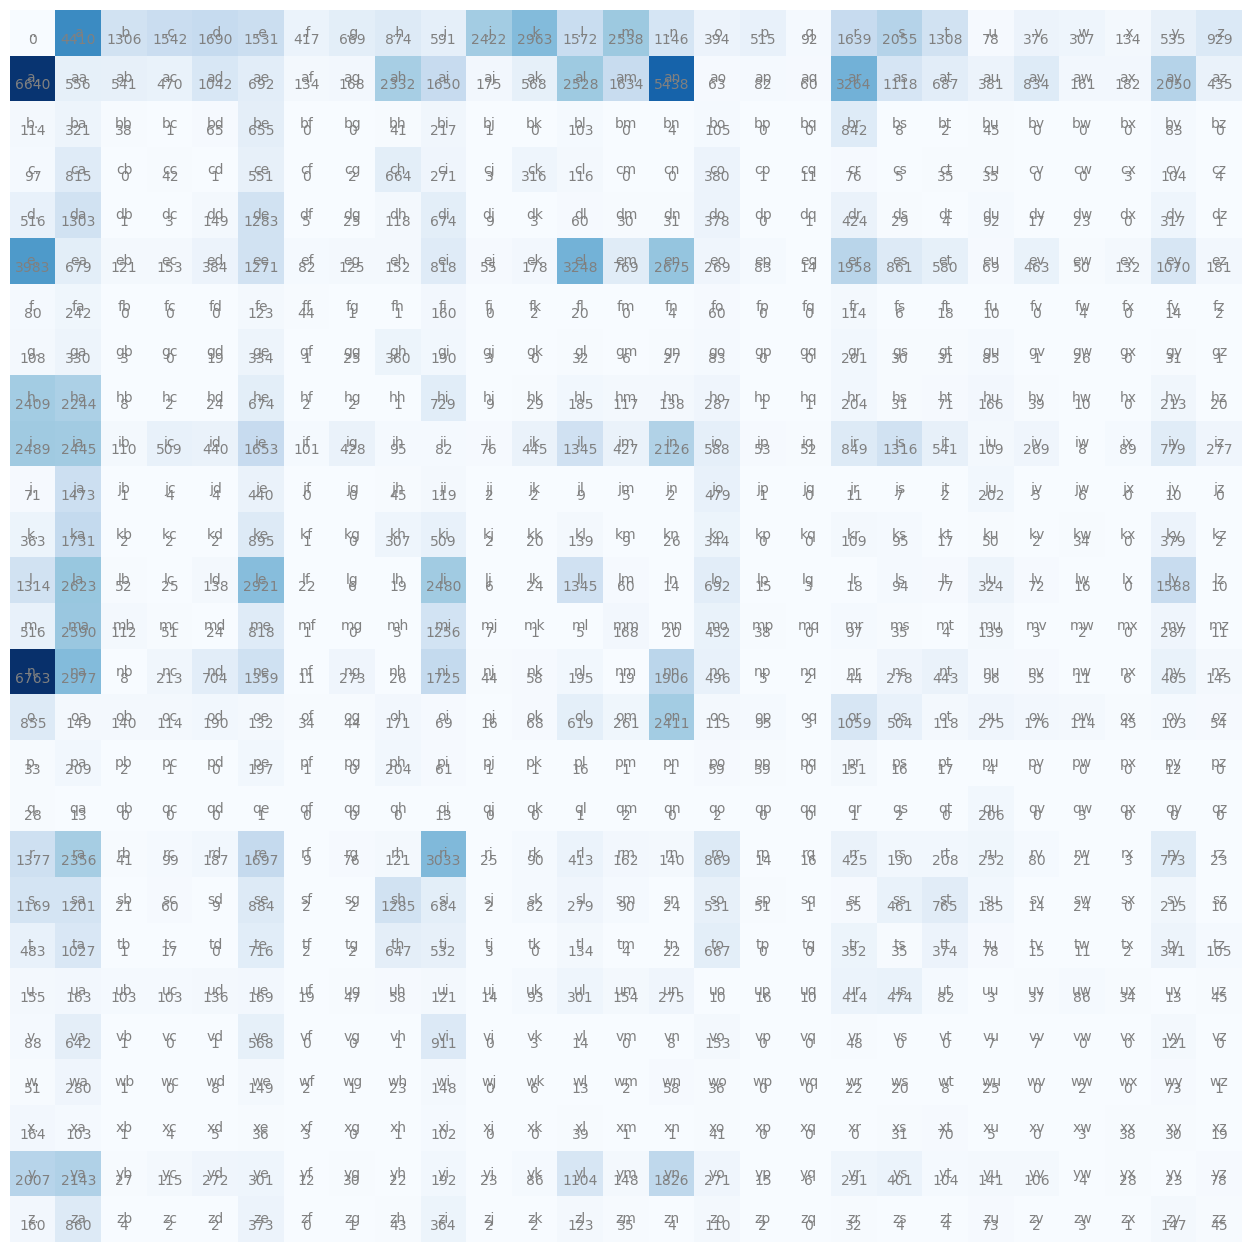

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] # bigram string
        plt.text(j, i, chstr, ha='center', va='center', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [14]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
# Convert to probabilities
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

# How does sampling from distribution work?

In [16]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [17]:
# Sampling from distribution
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [18]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

# Broadcasting!

In [19]:
P = N.float()
P = P / P.sum(axis=1, keepdim=True)
P[0].sum()

tensor(1.)

In [20]:
P.sum(1, keepdim=True).shape # torch.Size([27, 1])
P.sum(1).shape # torch.Size([27])

torch.Size([27])

In [21]:
# Will P / P.sum(axis=1) work?
# 1: Align shapes on the right:
# 27, 27
#     27
# 2: Either the dimensions are equal, one of them is 1, or one of them does not exist (we have this)
# 27, 27
# 1, 27 -> makes a 1
# 3: This is a bug! It will work, but not normalize as we want. It will divide all rows first elements by first row sum
# rows second elements by second row sum, etc. Not all first row elements by first row sum, etc.
# So we need to keep the dimension with keepdim=True

In [22]:
# Efficiency
P = N.float()
P /= P.sum(axis=1, keepdim=True)

# Generate some names

In [23]:
# Generate some names
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


# Evaluating Quality: Loss (negative log-likelihood)

In [24]:
# likelihood is product of probabilities of each bigram -> maximize 
# log likelihood is sum of log probabilities of each bigram -> maximize
# negative log likelihood -> minimize
# Often we average the nll by number of bigrams -> minimize

In [25]:
log_likelihood = 0.0
n = 0
for w in ["arthur"]:
    chs = ['.'] + list(w) + ['.'] # Start and End tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

.a: 0.1377 -1.9829
ar: 0.0963 -2.3400
rt: 0.0164 -4.1118
th: 0.1162 -2.1528
hu: 0.0218 -3.8260
ur: 0.1321 -2.0245
r.: 0.1084 -2.2217
log_likelihood=tensor(-18.6598)
nll=tensor(18.6598)
nll/n=tensor(2.6657)


# Model smoothing

In [26]:
# Model smoothing: no zeros in prob. matrix P -> avoid infinity

P = (N+1).float()
P /= P.sum(axis=1, keepdim=True)

g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

# No infinity in nll calculation
log_likelihood = 0.0
n = 0
for w in ["arthurjq"]:
    chs = ['.'] + list(w) + ['.'] # Start and End tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
.a: 0.1376 -1.9835
ar: 0.0963 -2.3405
rt: 0.0164 -4.1091
th: 0.1158 -2.1561
hu: 0.0219 -3.8236
ur: 0.1312 -2.0307
rj: 0.0020 -6.1934
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-32.9518)
nll=tensor(32.9518)
nll/n=tensor(3.6613)


# Neural Network: create training set

In [27]:
# create training set (x, y), x=input char, y=next char
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.'] # Start and End tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(f'{ch1}{ch2}: {ix1} {ix2}')
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
# torch.Tensor() does not infer dtype automatically

.e: 0 5
em: 5 13
mm: 13 13
ma: 13 1
a.: 1 0


One-hot encoding: encode integers into bits

In [28]:
import torch.nn.functional as F

In [29]:
xenc = F.one_hot(xs, num_classes=27)
xenc.dtype # we want floats for neural networks
xenc = xenc.float()
xenc.dtype

torch.float32

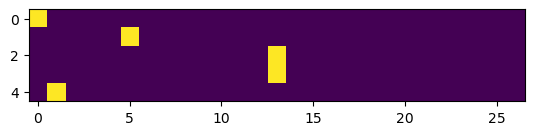

In [30]:
plt.imshow(xenc)

Create first neuron

In [31]:
W = torch.randn((27, 1)) # 1 neuron
W = torch.randn((27, 27)) # 27 neurons
xenc @ W # (5, 27) @ (27, 27) -> (5, 27)

(xenc @ W)[3, 13] # This is activation of 13th neuron for 4th input

tensor(1.2536)

Output understanding: we assume nn outputs log-counts (numbers btwn -inf and +inf), and we want counts -> so we exponentiate

In [32]:
logits = xenc @ W # log-counts for each of the 27 possible output characters
counts = logits.exp() # sort of equivalent to N matrix
probs = counts / counts.sum(1, keepdim=True) # probabilities are counts normalized
probs

tensor([[0.0288, 0.0049, 0.1082, 0.0093, 0.0263, 0.0161, 0.0157, 0.0108, 0.0203,
         0.0608, 0.0223, 0.0113, 0.0640, 0.0468, 0.0093, 0.0179, 0.0980, 0.0162,
         0.0072, 0.1950, 0.0456, 0.0232, 0.0638, 0.0255, 0.0114, 0.0187, 0.0227],
        [0.1498, 0.0312, 0.0195, 0.0142, 0.0016, 0.0441, 0.0264, 0.0029, 0.0816,
         0.0138, 0.1290, 0.0106, 0.1478, 0.0265, 0.0268, 0.0101, 0.0527, 0.0040,
         0.0257, 0.0115, 0.0074, 0.0068, 0.0508, 0.0143, 0.0434, 0.0129, 0.0344],
        [0.0217, 0.0222, 0.0480, 0.0159, 0.0360, 0.0056, 0.0391, 0.0449, 0.0115,
         0.0353, 0.0985, 0.0594, 0.0106, 0.1102, 0.0315, 0.0087, 0.0085, 0.0628,
         0.0450, 0.0266, 0.0441, 0.0105, 0.0191, 0.0097, 0.0307, 0.1291, 0.0147],
        [0.0217, 0.0222, 0.0480, 0.0159, 0.0360, 0.0056, 0.0391, 0.0449, 0.0115,
         0.0353, 0.0985, 0.0594, 0.0106, 0.1102, 0.0315, 0.0087, 0.0085, 0.0628,
         0.0450, 0.0266, 0.0441, 0.0105, 0.0191, 0.0097, 0.0307, 0.1291, 0.0147],
        [0.0088, 0.0290,

In [33]:
probs[0] # how likely is each character to follow the first input character

tensor([0.0288, 0.0049, 0.1082, 0.0093, 0.0263, 0.0161, 0.0157, 0.0108, 0.0203,
        0.0608, 0.0223, 0.0113, 0.0640, 0.0468, 0.0093, 0.0179, 0.0980, 0.0162,
        0.0072, 0.1950, 0.0456, 0.0232, 0.0638, 0.0255, 0.0114, 0.0187, 0.0227])

In [34]:
probs[0].sum()

tensor(1.0000)

# Summary

In [35]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [36]:
# Randomly initialize 27 neurons, each receiving 27 inputs (one hot encoded, so just a character)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g) # 27 neurons

In [37]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # forward pass: predict log-counts
# Softmax!
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [38]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()
    y = ys[i].item()
    print('----------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to neural network: ', x)
    print('output probabilities from neural network: ', probs[i])
    print('label (actual next character): ', y)
    p = probs[i, y]
    print('probability the net assigned to correct next char: ', p.item())
    logp = torch.log(p)
    print('log likelihood: ', logp.item())
    nll = -logp
    print('negative log likelihood: ', nll.item())
    nlls[i] = nll

print('================')
print('average negative log likelihood over all bigrams, i.e. loss = ', nlls.mean().item())

----------------
bigram example 1: .e (indexes 0, 5)
input to neural network:  0
output probabilities from neural network:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character):  5
probability the net assigned to correct next char:  0.01228625513613224
log likelihood:  -4.399273872375488
negative log likelihood:  4.399273872375488
----------------
bigram example 2: em (indexes 5, 13)
input to neural network:  5
output probabilities from neural network:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character):  13
probability the net assigned to correct next cha

# Training the neural network

In [39]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [40]:
# Randomly initialize 27 neurons, each receiving 27 inputs (one hot encoded, so just a character)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # 27 neurons

In [41]:
# Forwards pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # forward pass: predict log-counts
counts = logits.exp() # softmax
probs = counts / counts.sum(1, keepdim=True) # softmax
loss = -probs[torch.arange(5), ys].log().mean()

In [42]:
# Backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [43]:
print(loss.item())

3.7693049907684326


In [44]:
# Update weights
W.data += -0.1 * W.grad

# Summary

In [45]:
# Create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.'] # Start and End tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# Initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [46]:
(W**2).mean()

tensor(0.9665, grad_fn=<MeanBackward0>)

In [47]:
# Gradient descent loop

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() # Additional regularization term
    print(f'iteration {k+1}, loss = {loss.item()}')

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update weights
    W.data += -50 * W.grad

iteration 1, loss = 3.7686190605163574
iteration 2, loss = 3.3788068294525146
iteration 3, loss = 3.161090850830078
iteration 4, loss = 3.0271859169006348
iteration 5, loss = 2.9344842433929443
iteration 6, loss = 2.8672313690185547
iteration 7, loss = 2.816654682159424
iteration 8, loss = 2.777146577835083
iteration 9, loss = 2.745253801345825
iteration 10, loss = 2.7188303470611572
iteration 11, loss = 2.696505546569824
iteration 12, loss = 2.6773719787597656
iteration 13, loss = 2.6608052253723145
iteration 14, loss = 2.6463515758514404
iteration 15, loss = 2.633665084838867
iteration 16, loss = 2.622471570968628
iteration 17, loss = 2.6125476360321045
iteration 18, loss = 2.6037068367004395
iteration 19, loss = 2.595794916152954
iteration 20, loss = 2.5886809825897217
iteration 21, loss = 2.582256317138672
iteration 22, loss = 2.5764293670654297
iteration 23, loss = 2.5711238384246826
iteration 24, loss = 2.566272735595703
iteration 25, loss = 2.5618226528167725
iteration 26, loss 

# Inference

In [ ]:
# Sample from neural network
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        # BEFORE
        # p = P[ix]
        # NOW
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p[0], num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emim.
sade.
enkaviyny.
fobsp.
hinivenvtahlasu.
dsor.
br.
jol.
pyawaisan.
ja.
fdinee.
zka.
deru.
firit.
gaikajahahbevare.
kiystqelenaririenah.
keen.
x.
al.
kal.
thavazeeromysos.
laitjanadeegphahaifyen.
k.
illeleldole.
meenisammho.
ma.
mmin.
asharficalcalh.
ciayn.
asaza.
elanely.
chay.
rana.
ai.
yanamisashougnich.
beyncaro.
allan.
annutetoradrilia.
rddemkaha.
cahfahdaiadanala.
j.
gh.
cryalan.
rlrylmach.
ro.
pxxhayd.
en.
aienossin.
me.
jancla.
tiesel.
jedahzynaleronerzevituriron.
cni.
alkismeamere.
morad.
lieinaronamnnf.
miayuleonteadajeya.
renari.
x.
keika.
s.
ynn.
miudawa.
chahan.
jdidelie.
kedariza.
lha.
dqwoni.
kdr.
kavanista.
kmarorlilaa.
lelike.
ssh.
drz.
rcaga.
aicalasion.
avpllciny.
boh.
en.
caikeladeradefwiea.
fes.
malolela.
liy.
elan.
jalinain.
rmayoadish.
con.
alomaruikeee.
djayn.
